In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.8.0
2.8.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 2s 1us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [5]:
X_train_full.dtype

dtype('uint8')

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

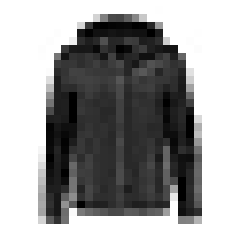

In [7]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [8]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Będziemy używać klas numerycznych i nazw.

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

Możemy narysować więcej przykładów treningowych.

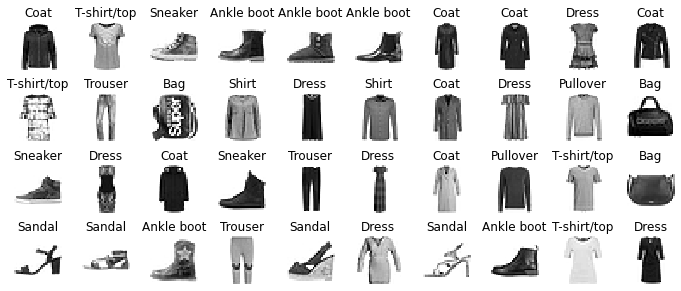

In [10]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad
Zbuduj i naucz sieć neuronową zgodnie z poniższym schematem. 

Epoch 1/3
1719/1719 [==============================] - 3s 2ms/step - loss: 1.9292 - accuracy: 0.4678 - val_loss: 1.4842 - val_accuracy: 0.6424
Epoch 2/3
1719/1719 [==============================] - 3s 1ms/step - loss: 1.2223 - accuracy: 0.6605 - val_loss: 1.0446 - val_accuracy: 0.6981
Epoch 3/3
1719/1719 [==============================] - 2s 1ms/step - loss: 0.9336 - accuracy: 0.7092 - val_loss: 0.8571 - val_accuracy: 0.7181


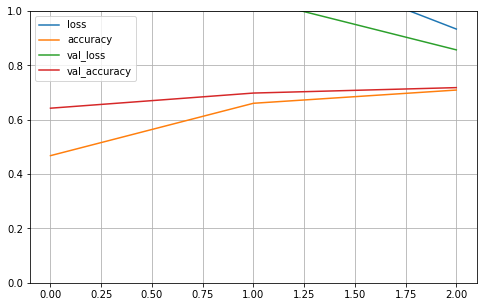

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
 
from keras.callbacks import History

history = History()
model = Sequential()
model.add(Flatten())
model.add(Dense(300,activation="sigmoid", input_shape=(X_train.shape[1],)))
model.add(Dense(100,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
 
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32, epochs=3)
 
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [13]:
hidden1 = model.layers[1]
hidden1.name

weights, biases = hidden1.get_weights()

In [14]:
weights

array([[-0.05520344,  0.03406855,  0.04402655, ...,  0.03054102,
         0.07394797, -0.05633964],
       [ 0.00228759, -0.07316122, -0.07023893, ...,  0.00702436,
        -0.02174483, -0.00971211],
       [ 0.0492187 , -0.00691399,  0.04771027, ..., -0.01197499,
         0.05883931, -0.03829815],
       ...,
       [ 0.0617518 ,  0.06598438, -0.0391531 , ..., -0.01512294,
        -0.03419385,  0.06171478],
       [ 0.01397247, -0.03084759, -0.0109599 , ..., -0.00712997,
         0.00733656,  0.03840926],
       [ 0.03529681,  0.03872954,  0.01968303, ..., -0.00670641,
         0.02398635,  0.01793317]], dtype=float32)

In [15]:
print(weights.shape)

(784, 300)


In [16]:
biases

array([-4.86143224e-04,  8.22026690e-04,  1.83553640e-02, -2.83198664e-03,
        2.02168040e-02, -7.05426512e-03, -1.78739019e-02,  2.00164248e-03,
        1.64661976e-03, -8.30817409e-03, -1.28467577e-02,  9.72863194e-03,
        8.22605286e-03,  2.57803407e-02, -2.84731301e-04, -9.25205555e-03,
        1.40090450e-03,  2.34118616e-03,  2.33317260e-03,  6.57992065e-03,
        1.64847113e-02,  4.14833147e-03, -1.34407368e-03,  9.36814956e-03,
       -2.62382138e-03, -7.74570927e-03, -2.59725074e-03,  2.48118909e-03,
        1.93946678e-02,  4.38952539e-03, -1.49046746e-03, -2.03559268e-02,
       -1.71709936e-02,  1.14111658e-02,  6.68199873e-03,  1.88906351e-03,
       -6.97578536e-03,  1.33652063e-02,  1.65060663e-03,  7.22353812e-04,
       -1.34778917e-02, -8.14828277e-03,  2.31563603e-03,  2.72833946e-04,
        1.35085462e-02,  8.62611271e-03,  1.86200086e-02, -4.24667029e-03,
       -6.05864800e-04, -1.12376455e-02, -4.70808893e-03,  2.92608095e-03,
        1.73692554e-02, -

In [17]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Mozna też uzyć w tej formie:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [18]:
 history.params

{'verbose': 1, 'epochs': 3, 'steps': 1719}

In [19]:
 print(history.epoch)

[0, 1, 2]


In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

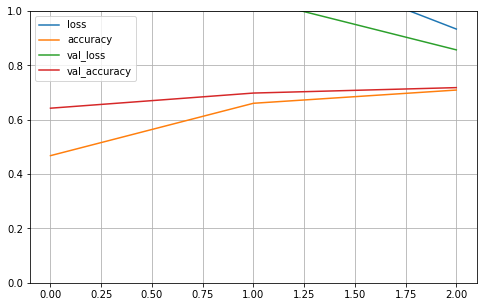

In [21]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [22]:
 model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 886us/step - loss: 0.8571 - accuracy: 0.7181


[0.8570573925971985, 0.7181000113487244]

In [23]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.05, 0.01, 0.15, 0.1 , 0.07, 0.97, 0.23, 0.95, 0.85, 0.97],
       [0.62, 0.03, 0.97, 0.22, 0.96, 0.07, 0.94, 0.01, 0.73, 0.05],
       [0.8 , 0.99, 0.34, 0.96, 0.59, 0.17, 0.64, 0.05, 0.01, 0.  ]],
      dtype=float32)

In [26]:
y_pred = model.predict(X_new)
y_pred

array([[0.04894608, 0.00777382, 0.15347248, 0.09526184, 0.06866187,
        0.96782494, 0.22837716, 0.954602  , 0.85460496, 0.9725628 ],
       [0.62173915, 0.0343346 , 0.97417283, 0.21943554, 0.9617144 ,
        0.06658718, 0.94208455, 0.00671622, 0.72744346, 0.04674539],
       [0.80212516, 0.9948473 , 0.3411922 , 0.9639002 , 0.588951  ,
        0.1671716 , 0.6443514 , 0.04859465, 0.00740734, 0.002067  ]],
      dtype=float32)

In [28]:
np.array(class_names)[y_pred]

IndexError: arrays used as indices must be of integer (or boolean) type

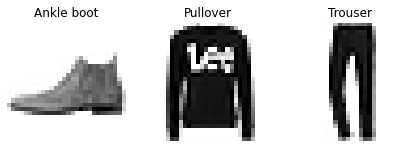

In [29]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()